In [111]:
# Очистка данных

In [1]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# чтение данных
df = pd.read_csv('df.csv')
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(100733, 12)
id                     int64
rooms                 object
cost(₽)              float64
square(м²)           float64
cost_for_meter(₽)    float64
address               object
metro_name            object
distance(м)          float64
center_distance/m    float64
floor                  int64
floors                 int64
description           object
dtype: object
['id' 'cost(₽)' 'square(м²)' 'cost_for_meter(₽)' 'distance(м)'
 'center_distance/m' 'floor' 'floors']
['rooms' 'address' 'metro_name' 'description']


<AxesSubplot:>

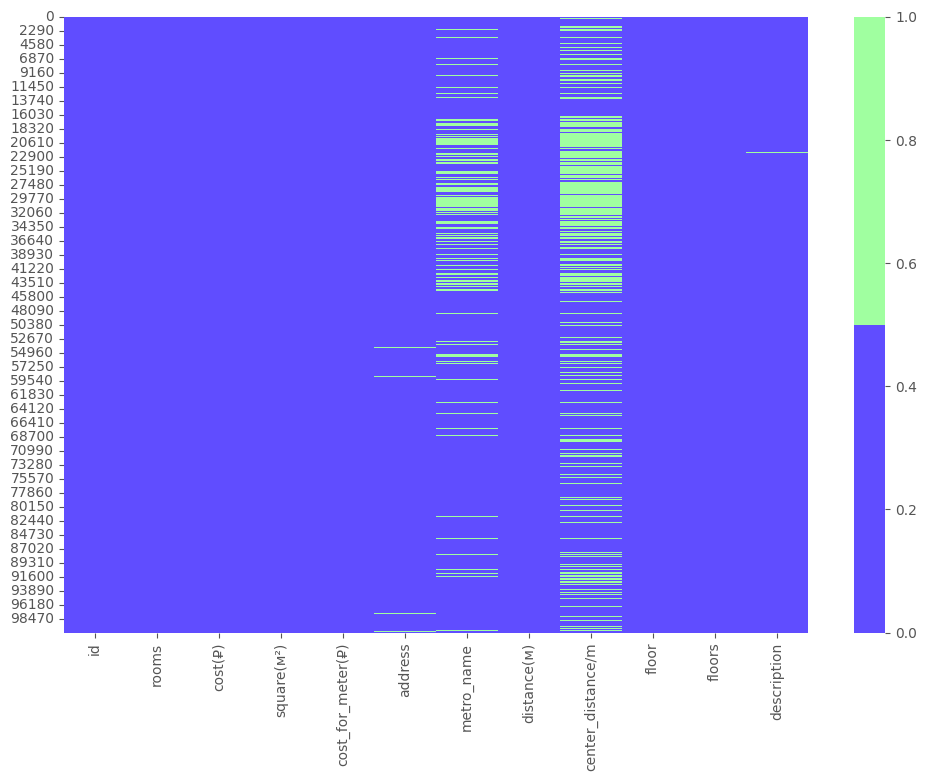

In [3]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# салатовый - пропущенные данные, сиреневый - не пропущенные
colours = ['#604dff', '#a0ffa0'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
#Замена пропущенных категориальных признаков на _MISSING_ и числовых на 0
df['metro_name'] = df['metro_name'].fillna('_MISSING_')
df['description'] = df['description'].fillna('_MISSING_')
df['address'] = df['address'].fillna('_MISSING_')
df['center_distance/m']=df['center_distance/m'].fillna(0)

In [5]:
#Проверка
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
rooms - 0%
cost(₽) - 0%
square(м²) - 0%
cost_for_meter(₽) - 0%
address - 0%
metro_name - 0%
distance(м) - 0%
center_distance/m - 0%
floor - 0%
floors - 0%
description - 0%


In [6]:
df.head(5)

,id,rooms,cost(₽),square(м²),cost_for_meter(₽),address,metro_name,distance(м),center_distance/m,floor,floors,description
0,0,1 – комнатная,5000000.0,31.0,161290.3,"Центральная ул., 6",бульвар дмитрия донского,4995.0,20600.0,2,4,Прекрасная однокомнатная квартира в доме с лиф...
1,1,1 комната,4500000.0,98.0,45918.4,"Коптевская ул., 28к2",коптево,420.0,11400.0,3,5,"Светлая, просторная комната 19 кв. метров. Отд..."
2,2,1 – комнатная,10900000.0,36.1,301939.1,"15-я Парковая ул., 1/123 корп.2",измайловская,1680.0,10700.0,1,9,"Первомайская, 15 мин. пешкомТёплая уютная квар..."
3,3,1 комната,3650000.0,93.0,39247.3,"Матросская Тишина ул., 23/7",сокольники,1428.0,5400.0,4,5,"в шаговой доступности парк Сокольники. , Разви..."
4,4,доля (1/2),1200000.0,72.3,16597.5,"Центральная ул., 6",_MISSING_,0.0,0.0,1,2,Ильинское с.Все коммуникации центральные.Кварт...


<AxesSubplot:>

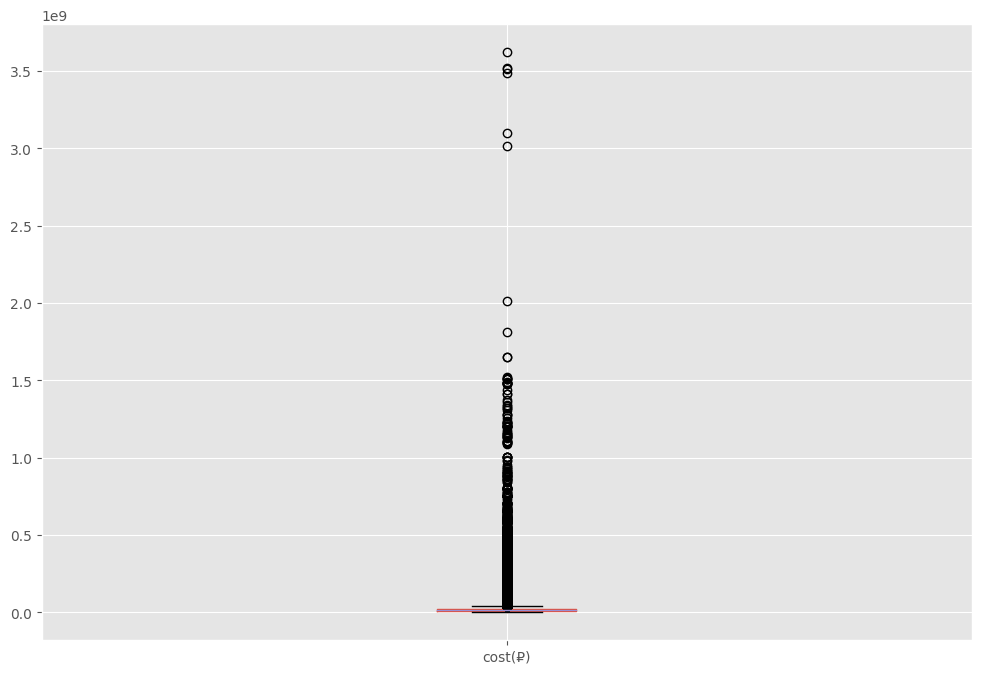

In [7]:
# Нахожу выбросы по цене
df.boxplot(column=['cost(₽)'])

In [9]:
# отбрасываю строки с выбросами
ind_missing = df[df['cost(₽)'] > 1600000000].index
df = df.drop(ind_missing, axis=0)

<AxesSubplot:>

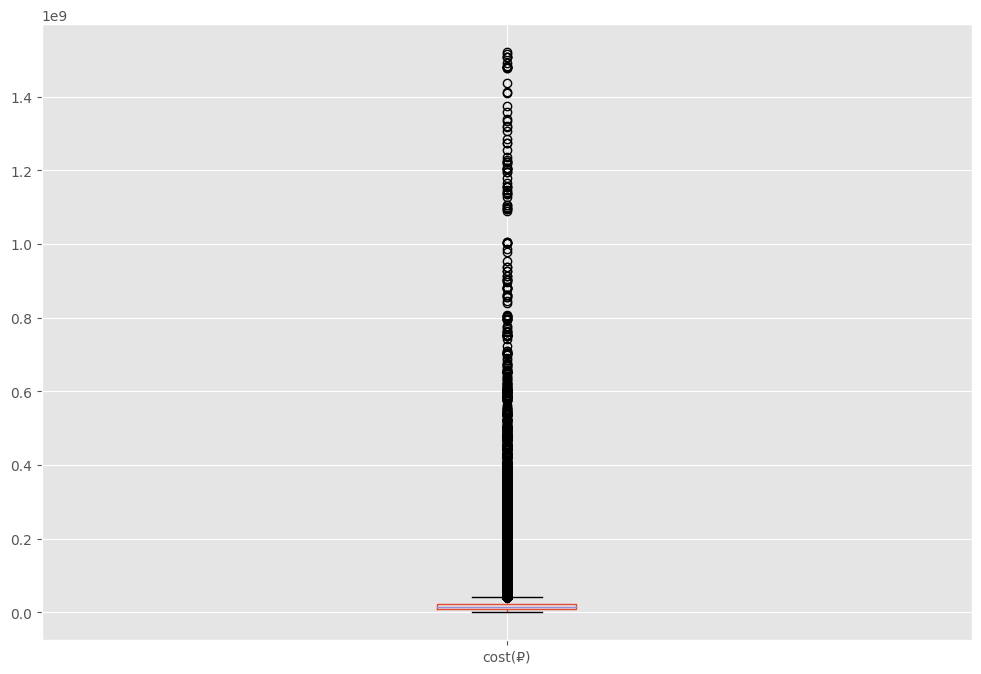

In [10]:
df.boxplot(column=['cost(₽)'])

In [11]:

df.to_csv('Сlean.csv',index=False)

In [12]:
df.head(5)

,id,rooms,cost(₽),square(м²),cost_for_meter(₽),address,metro_name,distance(м),center_distance/m,floor,floors,description
0,0,1 – комнатная,5000000.0,31.0,161290.3,"Центральная ул., 6",бульвар дмитрия донского,4995.0,20600.0,2,4,Прекрасная однокомнатная квартира в доме с лиф...
1,1,1 комната,4500000.0,98.0,45918.4,"Коптевская ул., 28к2",коптево,420.0,11400.0,3,5,"Светлая, просторная комната 19 кв. метров. Отд..."
2,2,1 – комнатная,10900000.0,36.1,301939.1,"15-я Парковая ул., 1/123 корп.2",измайловская,1680.0,10700.0,1,9,"Первомайская, 15 мин. пешкомТёплая уютная квар..."
3,3,1 комната,3650000.0,93.0,39247.3,"Матросская Тишина ул., 23/7",сокольники,1428.0,5400.0,4,5,"в шаговой доступности парк Сокольники. , Разви..."
4,4,доля (1/2),1200000.0,72.3,16597.5,"Центральная ул., 6",_MISSING_,0.0,0.0,1,2,Ильинское с.Все коммуникации центральные.Кварт...
